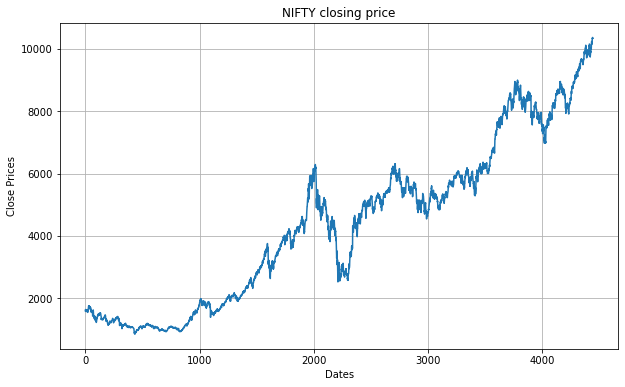

In [8]:
import pandas as pd
from matplotlib import pyplot
data = pd.read_csv("nifty17years.csv")
series=data['Close']
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(series)
plt.title('NIFTY closing price')
plt.show()

C:\Users\neera\AppData\Local\Temp/ipykernel_3744/1775209085.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series, model='multiplicative', freq = 30)


<Figure size 432x288 with 0 Axes>

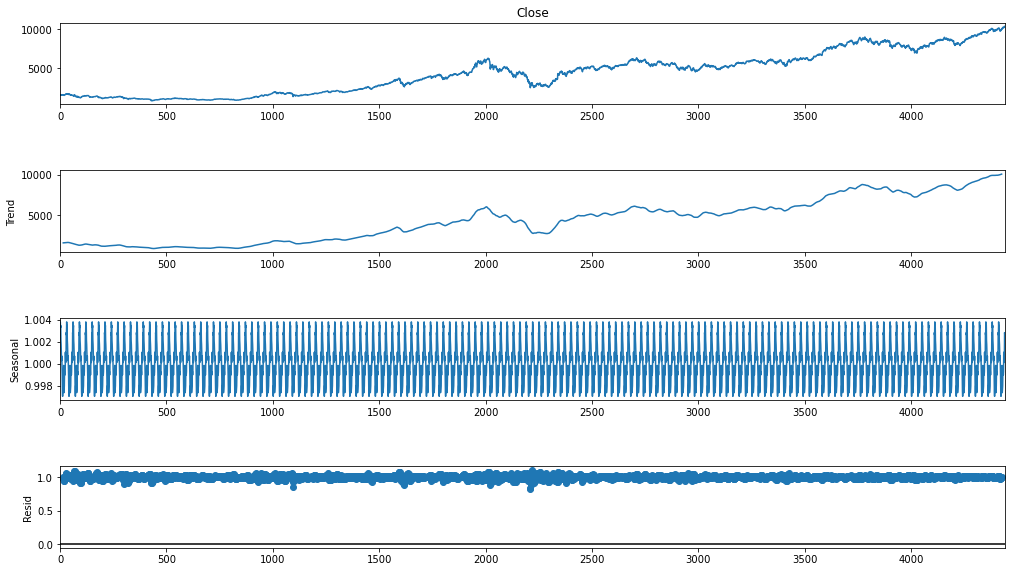

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<AxesSubplot:title={'center':'Rolling Mean over 12 month period'}>

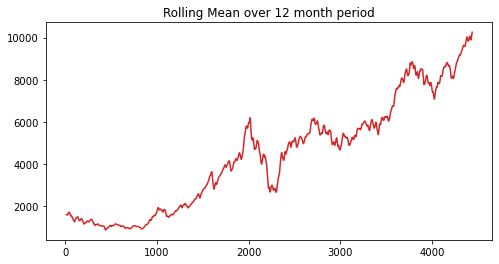

In [10]:
series.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period")

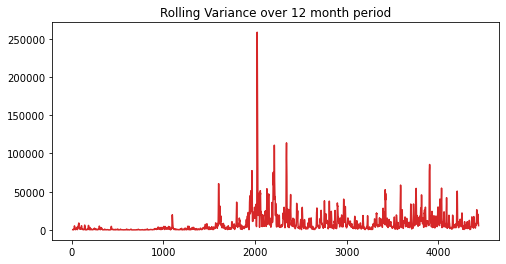

In [11]:
series.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");


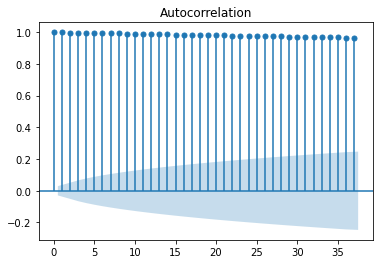

In [13]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(series);


Testing with Dicky-Fuller


We can perform Dicky-Fuller test functionality available with the statsmodels library. Below we'll test the stationarity of our time-series with this functionality and try to interpret its results to better understand it.

We can interpret above results based on p-values of result.

p-value > 0.05 - This implies that time-series is non-stationary.

p-value <=0.05 - This implies that time-series is stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data['Close'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.43898180684088184
2. P-Value :  0.982895626746854
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4426
5. Critical Values :
	 1% :  -3.4318283318219898
	 5% :  -2.862193244162659
	 10% :  -2.567117725860559


Remove Trend 

Logged Transformation
To apply log transformation, we need to take a log of each individual value of time-series data.

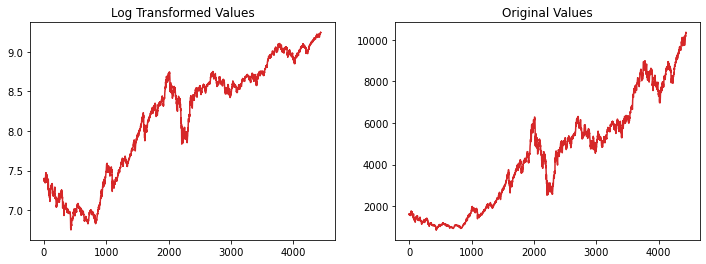

In [18]:
import numpy as np
logged_data = data['Close'].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
logged_data.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
data['Close'].plot(color="tab:red", title="Original Values", ax=ax2);

C:\Users\neera\AppData\Local\Temp/ipykernel_3744/1939731522.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_result = seasonal_decompose(logged_data, model='multiplicative', freq = 30)


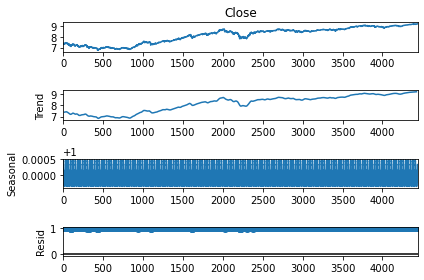

In [20]:
decompose_result = seasonal_decompose(logged_data, model='multiplicative', freq = 30)

decompose_result.plot();

Power Transformations

We can apply power transformation in data same way as that of log transformation to remove trend.

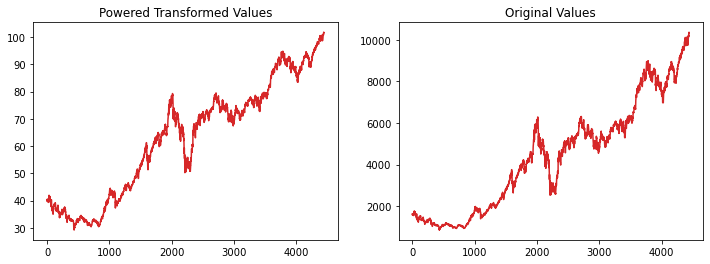

In [22]:
powered_data = data['Close'].apply(lambda x : x ** 0.5)

ax1 = plt.subplot(121)
powered_data.plot(figsize=(12,4), color="tab:red", title="Powered Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
data['Close'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

C:\Users\neera\AppData\Local\Temp/ipykernel_3744/2665451786.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_result = seasonal_decompose(powered_data, model='multiplicative', freq = 30)


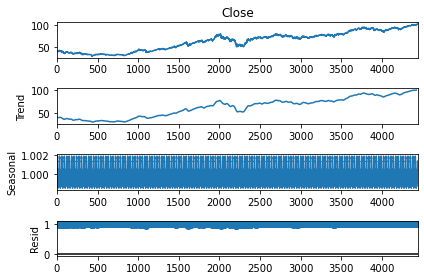

In [23]:
decompose_result = seasonal_decompose(powered_data, model='multiplicative', freq = 30)

decompose_result.plot();

Applying Moving Window Functions(DIfferencing)

We can calculate rolling mean over a period of 12 months and subtract it from original time-series to get de-trended time-series.

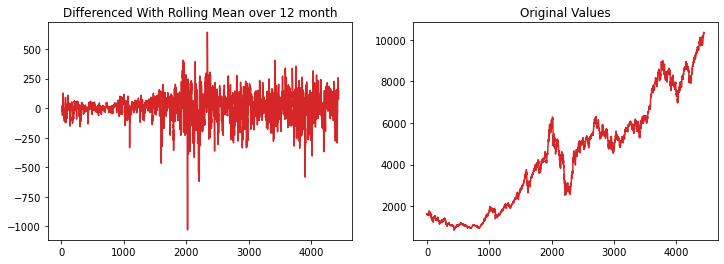

In [24]:
rolling_mean = data['Close'].rolling(window = 12).mean()
data_rolled_detrended = data['Close'] - rolling_mean

ax1 = plt.subplot(121)
data_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
data['Close'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

C:\Users\neera\AppData\Local\Temp/ipykernel_3744/681076028.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_result = seasonal_decompose(data_rolled_detrended.dropna(), model='additive', freq = 30)


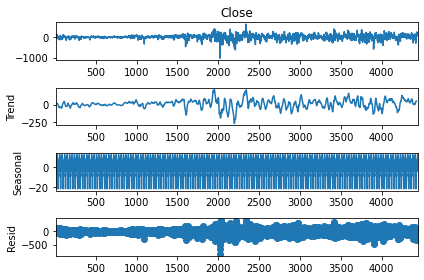

In [27]:
decompose_result = seasonal_decompose(data_rolled_detrended.dropna(), model='additive', freq = 30)

decompose_result.plot();

Applying Moving Window Function on Log Transformed Time-Series

We can apply more than one transformation as well. We'll first apply log transformation to time-series, then take a rolling mean over a period of 12 months and then subtract rolled time-series from log-transformed time-series to get final time-series.

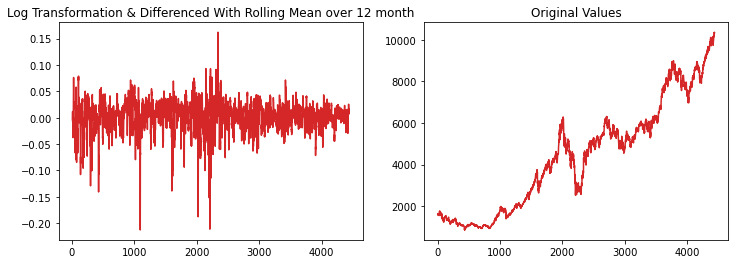

In [29]:
logged_data = pd.DataFrame(data['Close'].apply(lambda x : np.log(x)))

rolling_mean = logged_data.rolling(window = 12).mean()
data_log_rolled_detrended = logged_data['Close'] - rolling_mean['Close']


ax1 = plt.subplot(121)
data_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
data['Close'].plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

C:\Users\neera\AppData\Local\Temp/ipykernel_3744/1924297488.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_result = seasonal_decompose(data_log_rolled_detrended.dropna(), model='additive', freq = 30)


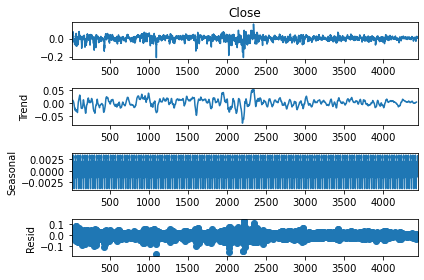

In [30]:
decompose_result = seasonal_decompose(data_log_rolled_detrended.dropna(), model='additive', freq = 30)

decompose_result.plot();